Zmienne:
 - PODM - liczba podmiotów gospodarczych w przeliczeniu na 1000 mieszkańców, - nominanta
 - BEZR - udział liczby bezrobotnych w liczbie osób w wieku produkcyjnym (%), - destymulanta
 - MIESZ - powierzchnia użytkowa mieszkań oddanych do użytkowania na 1000 ludności (w m^2), - nominanta
 - ZAL - gęstość zaludnienia (os./km2), - nominanta
 - PRZES - wskaźnik wykrywalności sprawców przestępstw kryminalnych (%) - stymulanta
 - EMI - emisja zanieczyszczeń pyłkowych na 10 km^2 - destymulanta
 - ZIEL - udział powierzchni terenów zieleni w powierzchni ogółem (%), - nominanta
 - NAKL - nakłady inwestycyjne na jednego mieszkańca (zł), - nominanta
 - WYN - przeciętne miesięczne wynagrodzenia brutto (zł). - stymulanta
j - kolumna
i - wiersz

Plik "powiaty" (dane dotyczące powiatów małopolski, bez miast na prawach powiatu, w 2023 roku):
 - NOCL - liczba miejsc noclegowych w przeliczeniu na 1000 ludności - nominanta,
 - ROW - długość dróg dla rowerów (km) - stymulanta,
 - PARK - powierzchnia parków spacerowo - wypoczynkowych (ha) - stymulanta,
 - LAS - powierzchnia gruntów leśnych (ha) - stymulanta,
 - KUL - ludność przypadająca na jedną instytucję kultury - centrum, dom, ośrodek kultury, klub i świetlicę - destymulanta,
 - IMPR - liczba masowych imprez artystyczno-rozrywkowych w przeliczeniu na 100 000 ludności - stymulanta,
 - MUZE - liczba muzeów łącznie z oddziałami - stymulanta,
 - EMIS - emisja zanieczyszczeń pyłkowych (t/r) - destymulanta,
 - PRZES - liczba przestępstw stwierdzonych przez policję w zakończonych postępowaniach przygotowawczych - destymulanta.

             NOCL         ROW        PARK           LAS           KUL  \
count   19.000000   19.000000   19.000000     19.000000     19.000000   
mean    34.155789   41.984211   48.127368  10505.802105   8851.421053   
std     88.572448   32.686750   82.788207  10726.549363   4547.067093   
min      2.000000    4.800000    6.200000    222.050000   2325.000000   
25%      4.715000   18.050000   10.035000   2272.725000   5387.500000   
50%      9.790000   36.300000   22.800000   7716.480000   8146.000000   
75%     16.845000   56.350000   49.120000  17238.245000  11295.000000   
max    394.510000  120.100000  370.870000  39014.330000  17785.000000   

            IMPR       MUZE        EMIS        PRZES  
count  19.000000  19.000000   19.000000    19.000000  
mean    4.473684   2.894737   24.263158  2104.578947  
std     2.294157   2.306867   31.762735  1477.530045  
min     0.000000   0.000000    2.000000   262.000000  
25%     3.000000   1.000000    5.000000  1275.000000  
50%     4.00

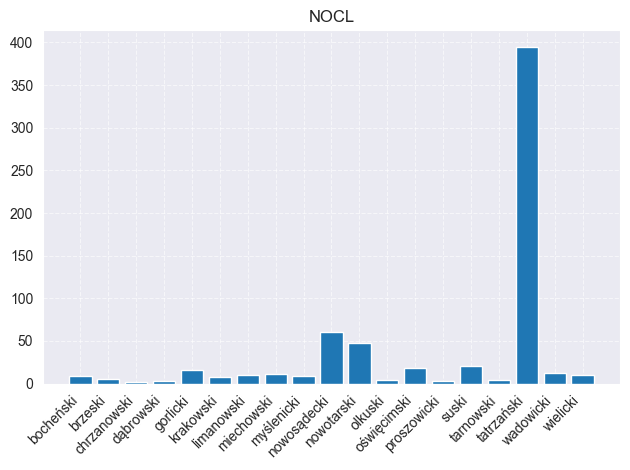

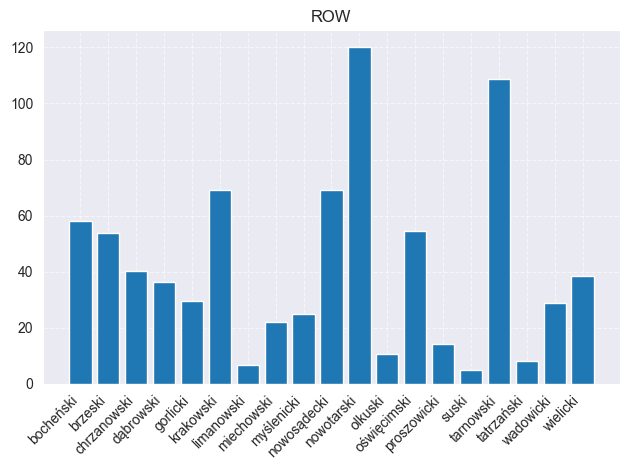

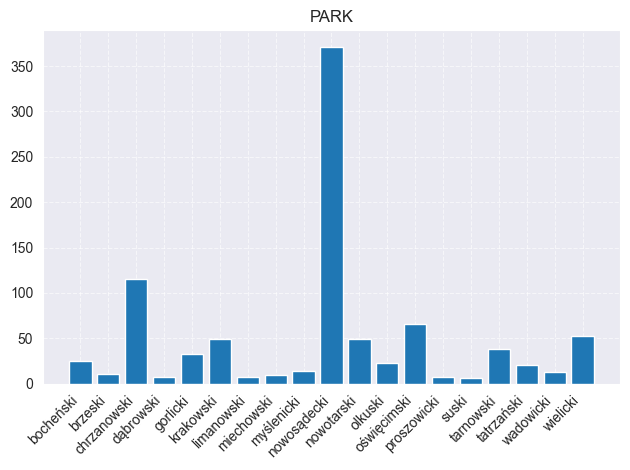

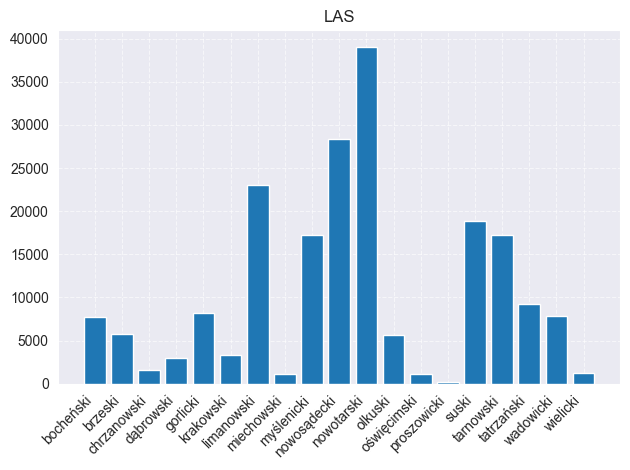

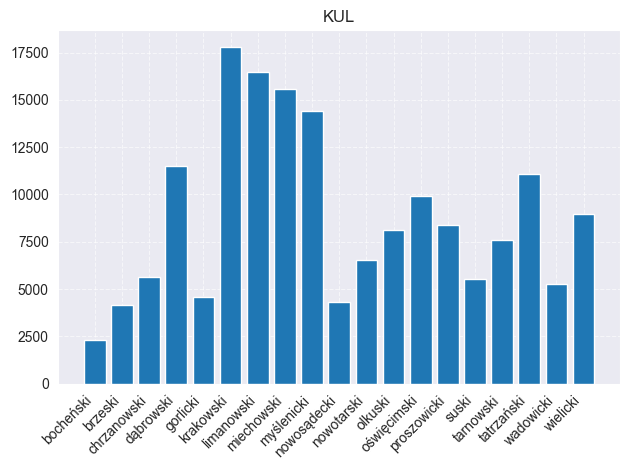

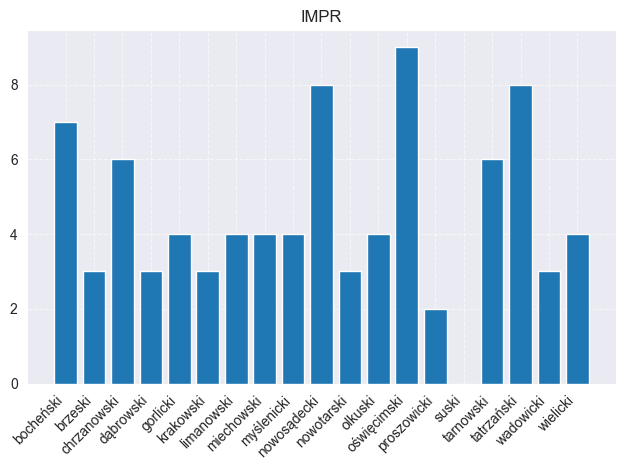

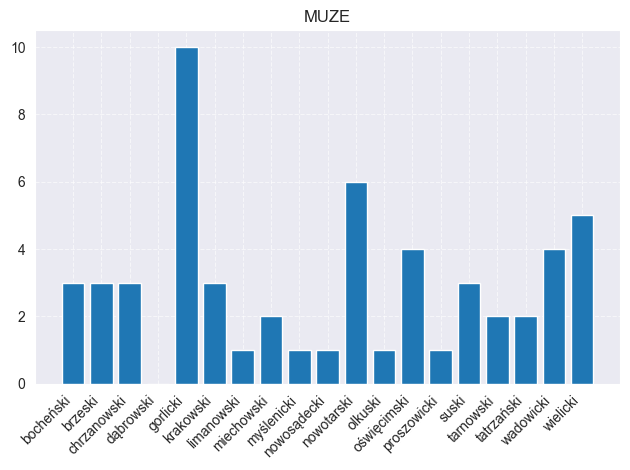

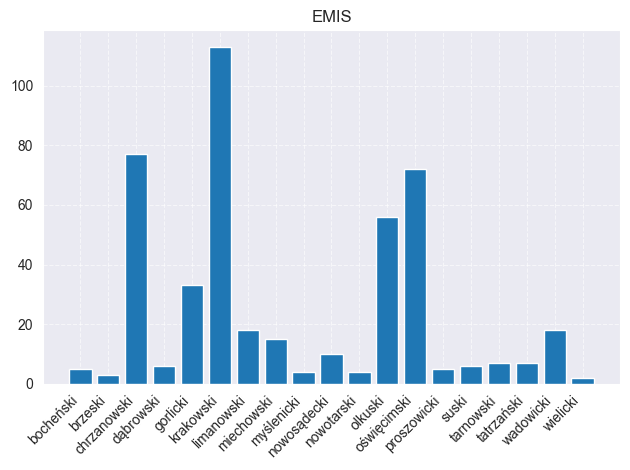

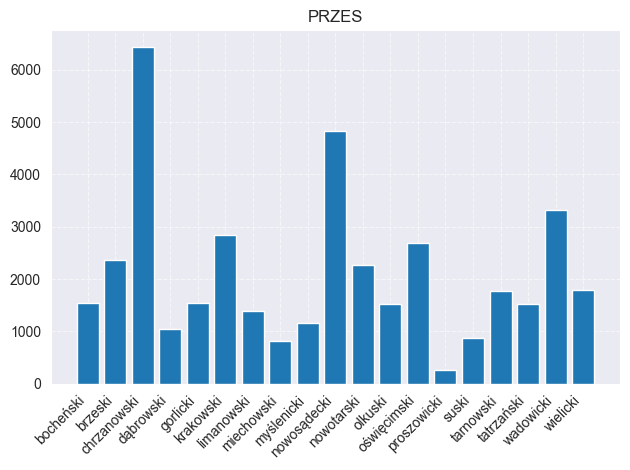

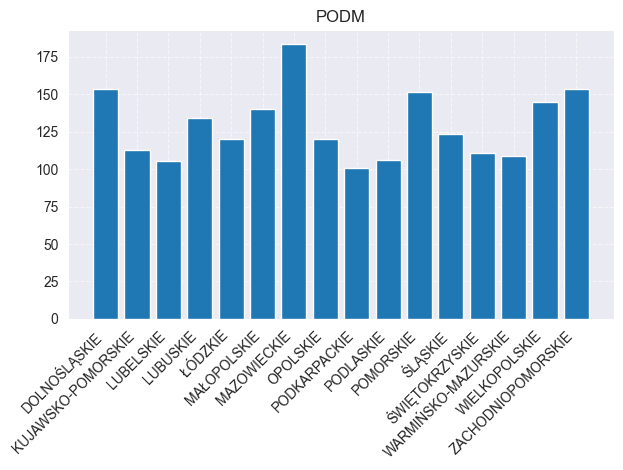

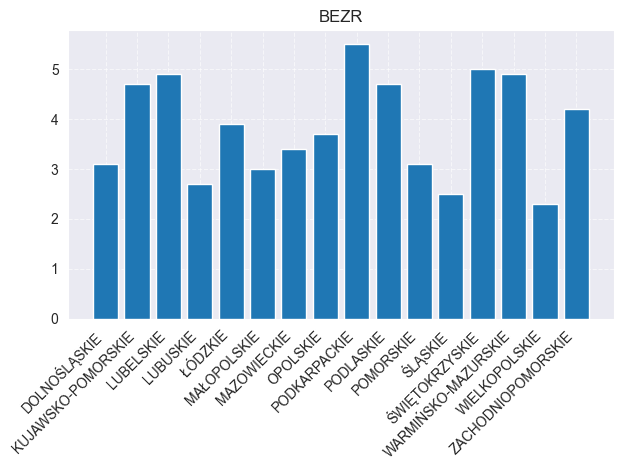

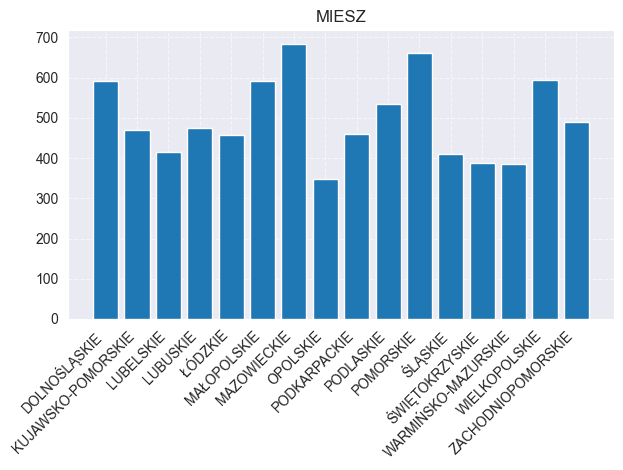

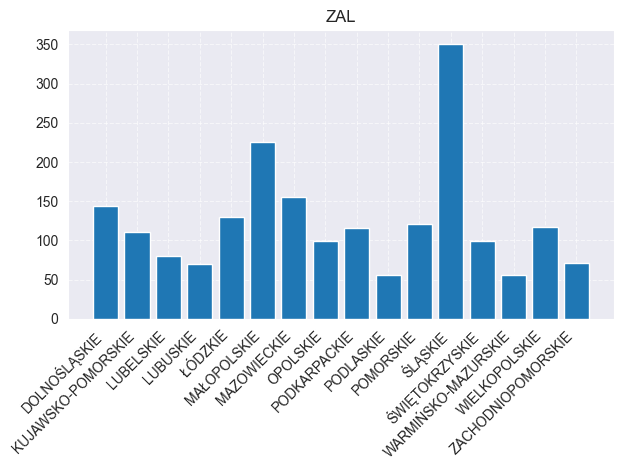

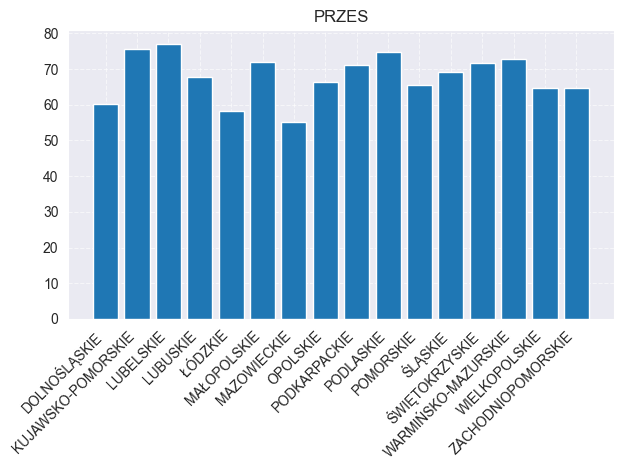

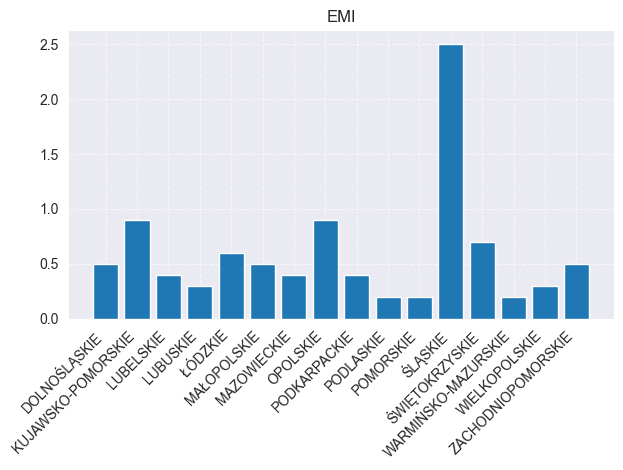

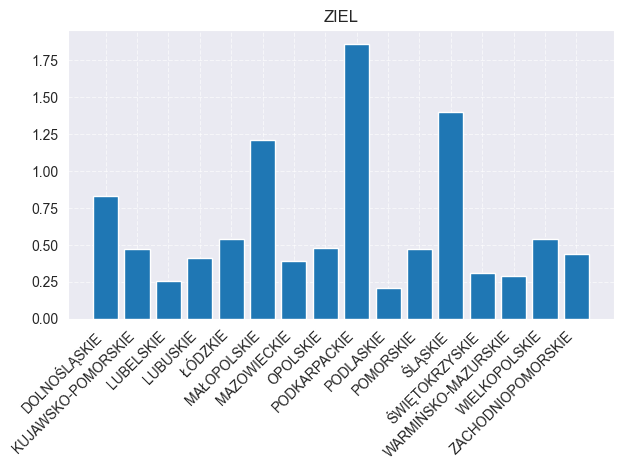

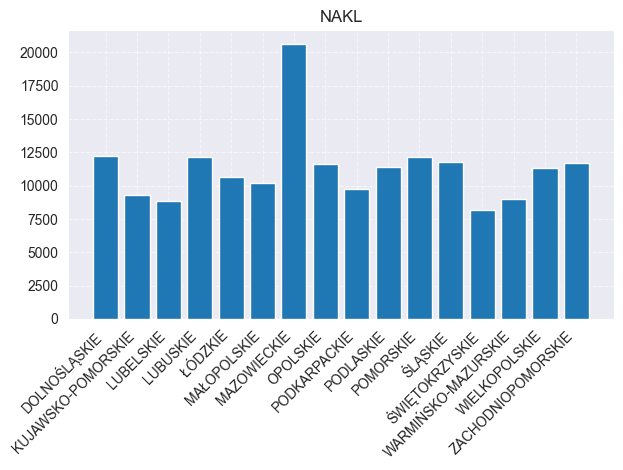

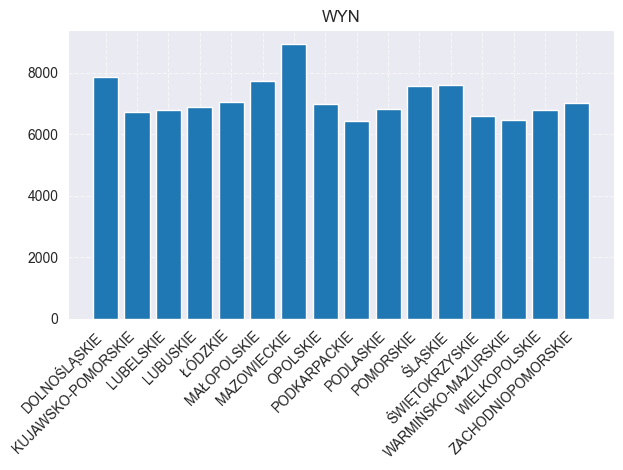

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

powiaty = pd.read_excel("DanePowiaty2023.xlsx")
powiaty["Powiat"] = powiaty["Powiat"].str.replace("Powiat ", "")

wojewodztwa = pd.read_excel("DaneWojewodztwa2023.xlsx")
print(powiaty.describe())
print(wojewodztwa.describe())

X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

X = wojewodztwa["wojewodztwo"]
for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.bar(X, Y, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()








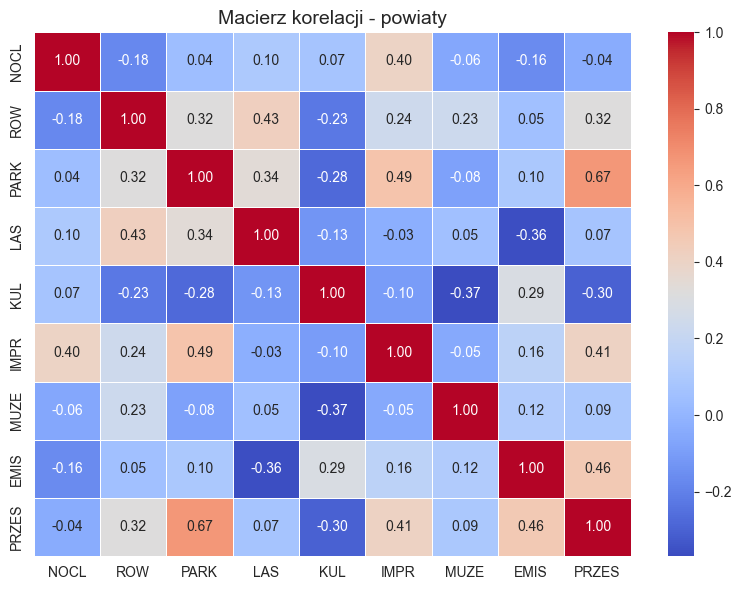

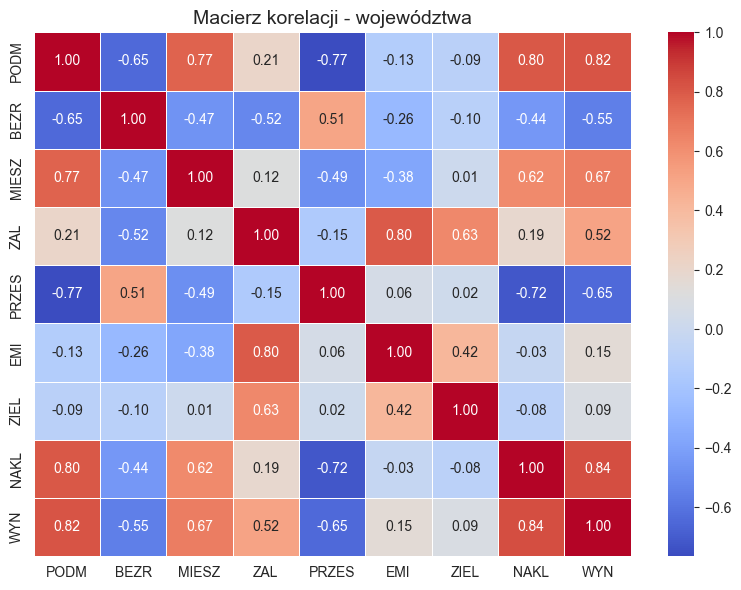

In [110]:

corr = powiaty.drop(columns=["Powiat"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - powiaty", fontsize=14)
plt.tight_layout()
plt.show()
corr2 = wojewodztwa.drop(columns=["wojewodztwo"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Macierz korelacji - województwa", fontsize=14)
plt.tight_layout()
plt.show()


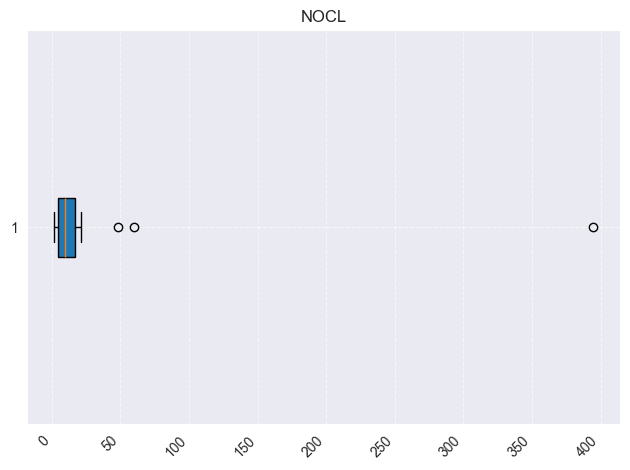

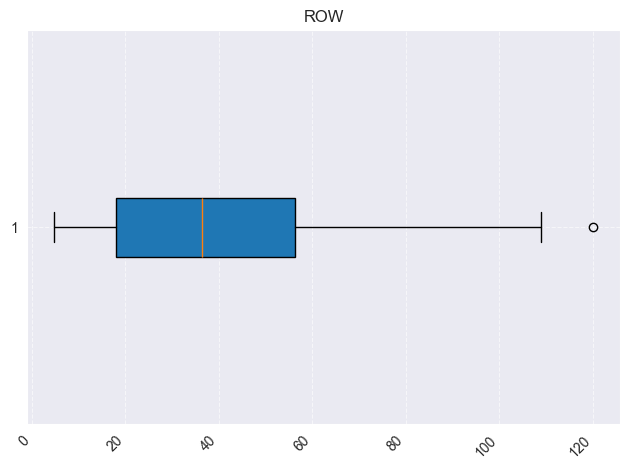

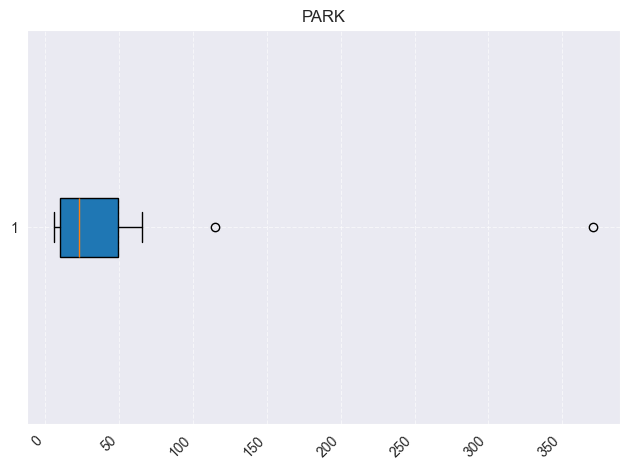

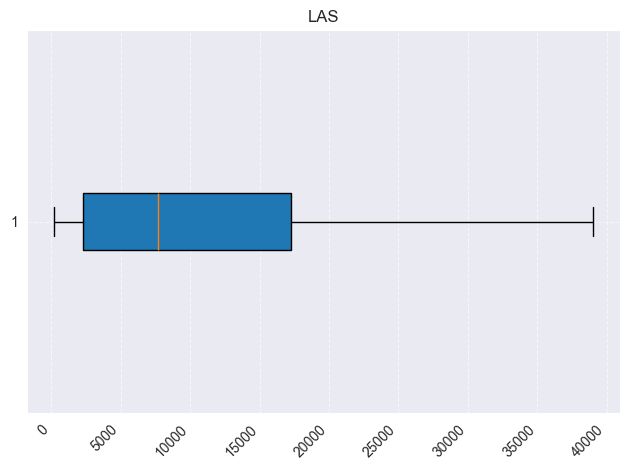

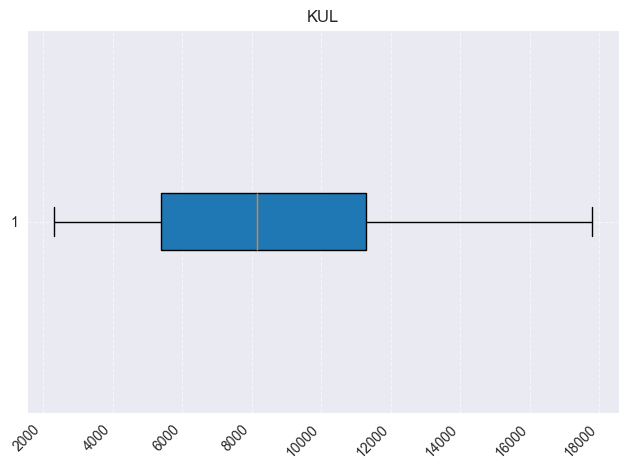

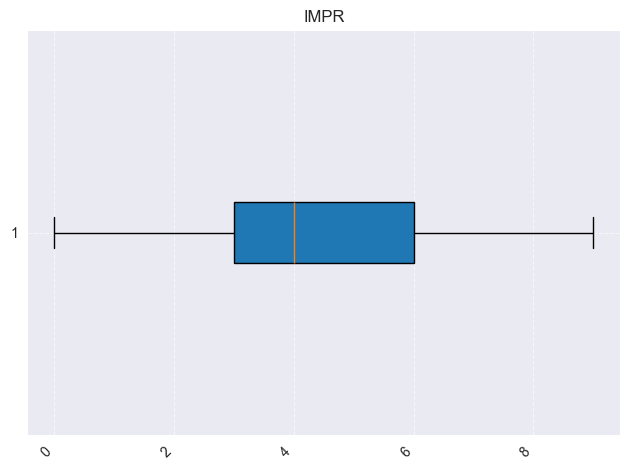

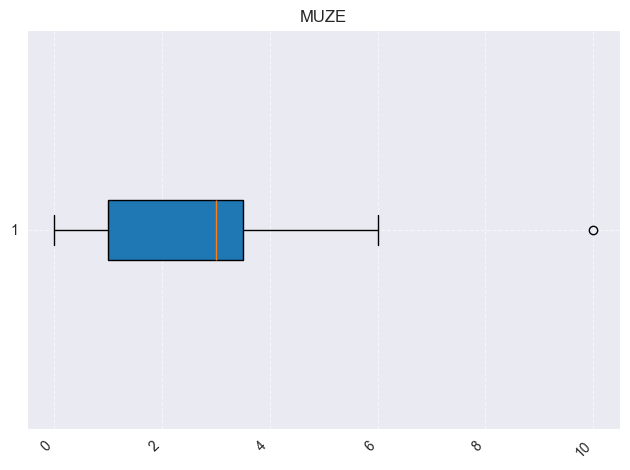

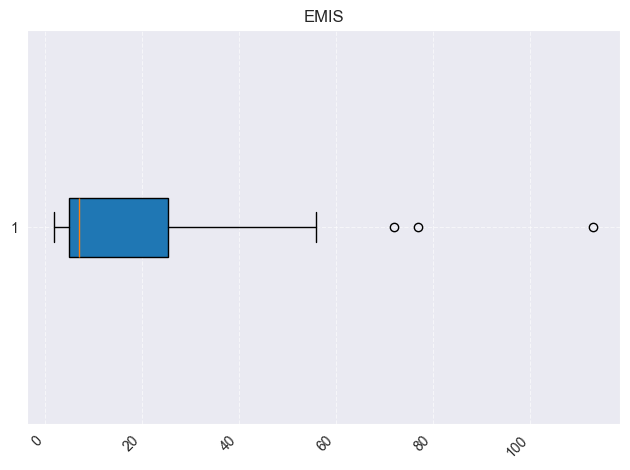

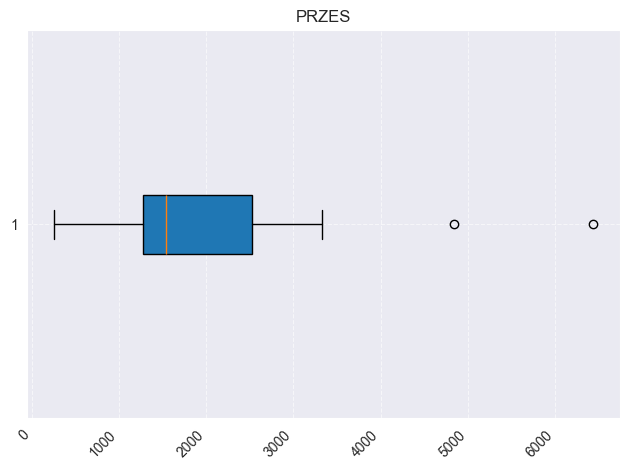

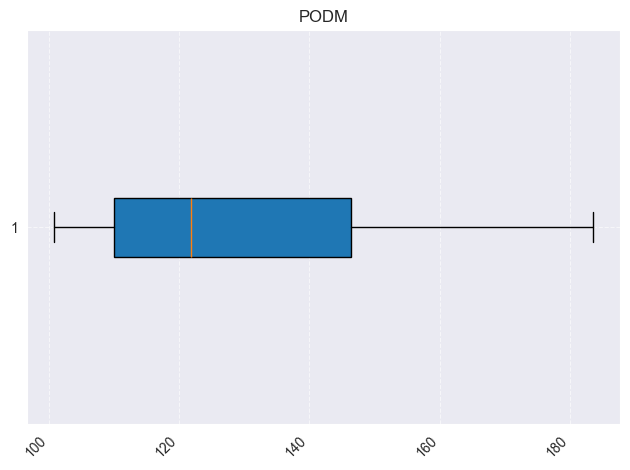

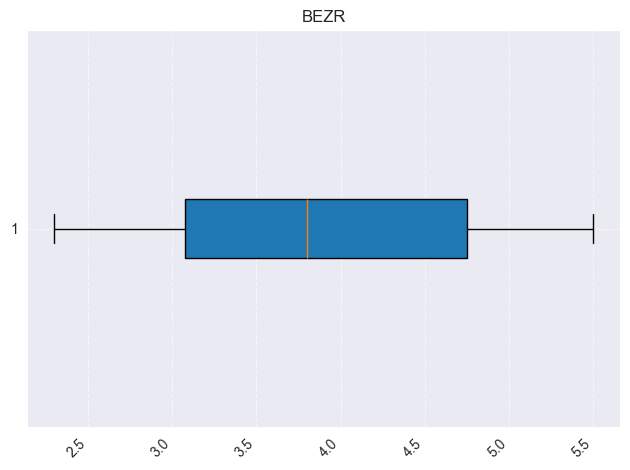

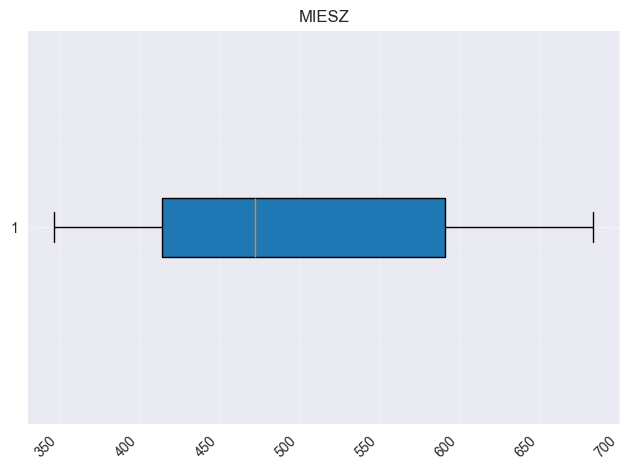

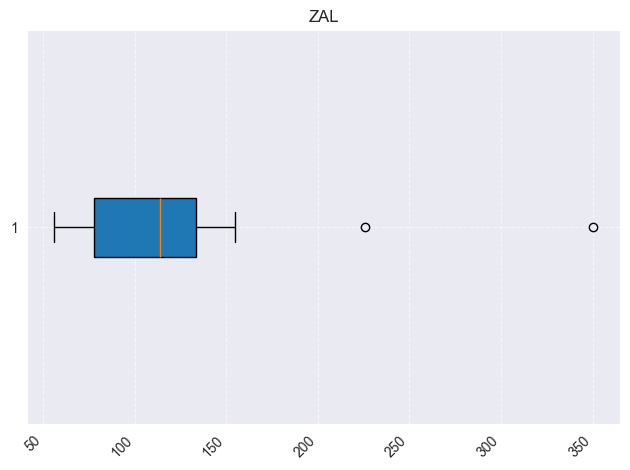

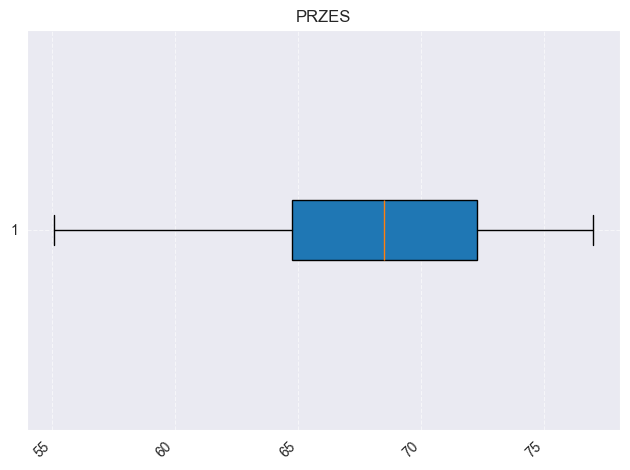

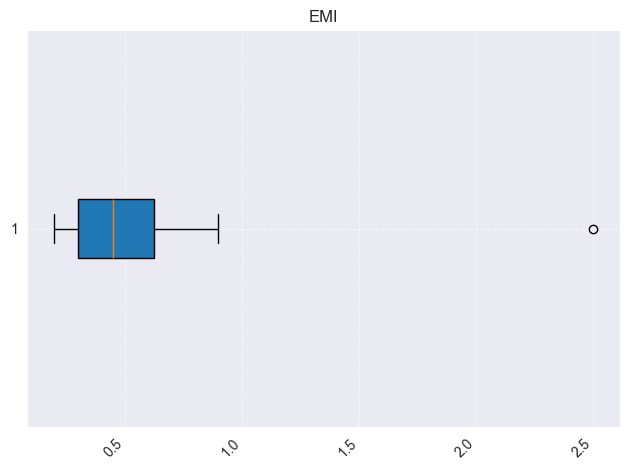

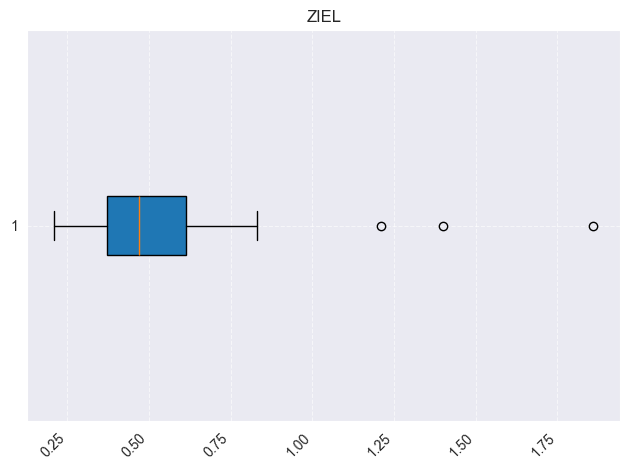

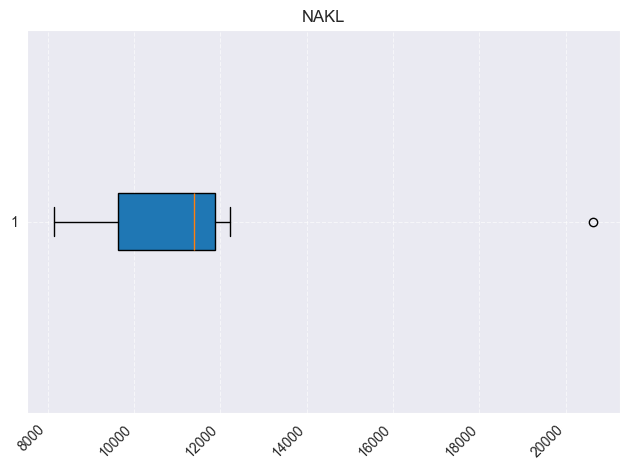

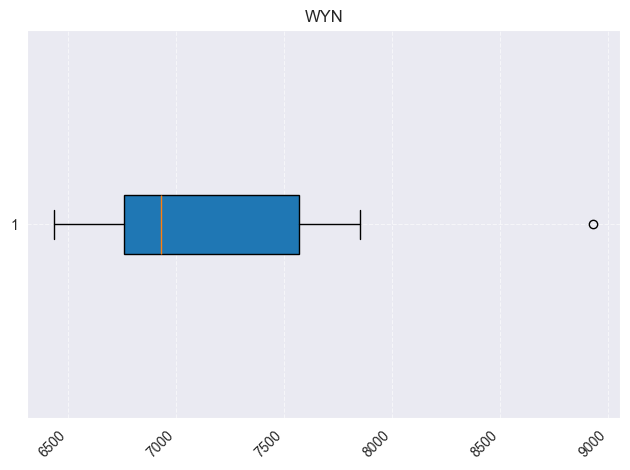

In [111]:
X = powiaty["Powiat"]

for col in powiaty.columns:
    if col == "Powiat":
        continue

    Y = powiaty[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()

X = wojewodztwa["wojewodztwo"]

for col in wojewodztwa.columns:
    if col == "wojewodztwo":
        continue

    Y = wojewodztwa[col]

    fig, ax = plt.subplots()
    ax.boxplot(Y, vert=False, patch_artist=True)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(col)  # tytuł = nazwa kolumny
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    plt.show()





In [112]:
def zamiana_destymulanty(df, nominanty, destymulanty, optimum):
    for col in df.columns:
        if col in nominanty:
            opt = optimum[nominanty.index(col)]
            for row in range(len(df)):
                val = df.loc[row, col]
                if val == opt:
                    df.loc[row, col] = 1
                elif val > opt:
                    df.loc[row, col] = 1 / (val - opt + 1)
                else:
                    df.loc[row, col] = -1 / (val - opt - 1)
        if col in destymulanty:
            df[col] = -df[col]
    return df

def standaryzacja(df):
    for col in df.select_dtypes(include="number").columns:
        mean = df[col].mean()
        stdev = df[col].std()
        df[col] = (df[col] - mean) / stdev
    return df

def stworz_wykres(arguments, values, label, rodzaj, legenda, title):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(arguments, values, zorder=3)
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
    ax.set_title(f"{title} dla {rodzaj}")
    plt.xticks(arguments, label, rotation=45, ha='right')
    ax.set_ylabel(legenda)
    fig.tight_layout()
    plt.show()

In [113]:
stymulanty_woj = ["PODM","PRZES", "ZIEL", "WYN", "NAKL", "IMPR"]
nominanty_woj = ["MIESZ", "ZAL"]
destymulanty_woj = ["BEZR", "EMI"]

stymulanty_pow = ["ROW","PARK","LAS","IMPR", "MUZE" ]
nominanty_pow= ["NOCL"]
destymulanty_pow= ["KUL","EMIS","PRZES" ]


optimum_woj = [wojewodztwa["MIESZ"].mean(), wojewodztwa["ZAL"].mean()]
optimum_pow = [powiaty["NOCL"].mean()]

wojewodztwa_stand = wojewodztwa.copy()
powiaty_stand = powiaty.copy()

powiaty_stand = zamiana_destymulanty(powiaty_stand, nominanty_pow, destymulanty_pow, optimum_pow)
powiaty_stand = standaryzacja(powiaty_stand)

wojewodztwa_stand = zamiana_destymulanty(wojewodztwa_stand, nominanty_woj, destymulanty_woj, optimum_woj)
wojewodztwa_stand = standaryzacja(wojewodztwa_stand)



=== RANKING POWIATÓW - METODA STANDARYZACJI (więcej = lepiej)===
         Powiat  syntetyczna_standaryzowana
0    nowotarski                    1.000000
1   nowosądecki                    0.854530
2      gorlicki                    0.673591
3     bocheński                    0.641693
4     tarnowski                    0.638787
5         suski                    0.504857
6   oświęcimski                    0.494866
7      wielicki                    0.449131
8       brzeski                    0.400667
9     wadowicki                    0.354241
10   myślenicki                    0.307594
11   tatrzański                    0.239965
12   limanowski                    0.237002
13   miechowski                    0.212272
14  proszowicki                    0.209599
15    dąbrowski                    0.188428
16      olkuski                    0.146640
17  chrzanowski                    0.135537
18    krakowski                    0.000000


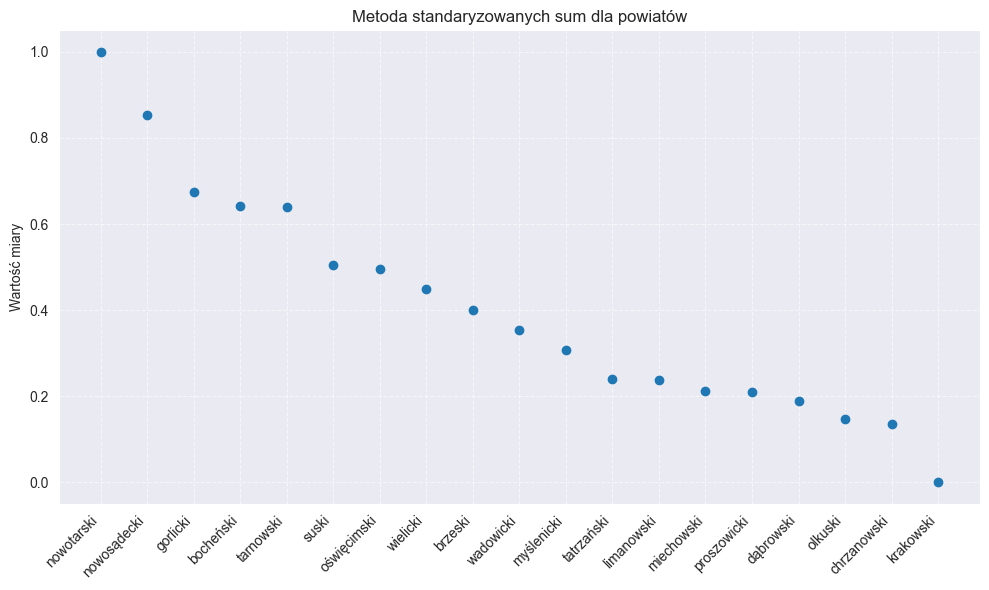

In [117]:
powiaty_stand["syntetyczna"] = powiaty_stand.iloc[:,1:].mean(axis=1)

# Standaryzacja syntetycznej
syntetyczna = powiaty_stand["syntetyczna"]
min_s = syntetyczna.min()
max_s = syntetyczna.max()
powiaty_stand["syntetyczna_standaryzowana"] = (syntetyczna - min_s) / (max_s - min_s)

posortowane_stand = powiaty_stand[["Powiat", "syntetyczna_standaryzowana"]].sort_values(
    by="syntetyczna_standaryzowana", ascending=False).reset_index(drop=True)

print("\n=== RANKING POWIATÓW - METODA STANDARYZACJI (więcej = lepiej)===")
print(posortowane_stand)


X = range(len(posortowane_stand))
Y = posortowane_stand["syntetyczna_standaryzowana"].values
labels = posortowane_stand["Powiat"]

stworz_wykres(X, Y, labels, "powiatów", "Wartość miary", "Metoda standaryzowanych sum")


=== RANKING - METODA STANDARYZACJI (więcej = lepiej)===
            wojewodztwo  syntetyczna_standaryzowana
0           MAZOWIECKIE                    1.000000
1             POMORSKIE                    0.866308
2           MAŁOPOLSKIE                    0.723347
3    ZACHODNIOPOMORSKIE                    0.719571
4          DOLNOŚLĄSKIE                    0.661825
5         WIELKOPOLSKIE                    0.651126
6              LUBUSKIE                    0.599144
7          PODKARPACKIE                    0.468771
8               ŁÓDZKIE                    0.445015
9               ŚLĄSKIE                    0.386857
10   KUJAWSKO-POMORSKIE                    0.297076
11            PODLASKIE                    0.286394
12             OPOLSKIE                    0.245545
13            LUBELSKIE                    0.141199
14  WARMIŃSKO-MAZURSKIE                    0.068595
15       ŚWIĘTOKRZYSKIE                    0.000000


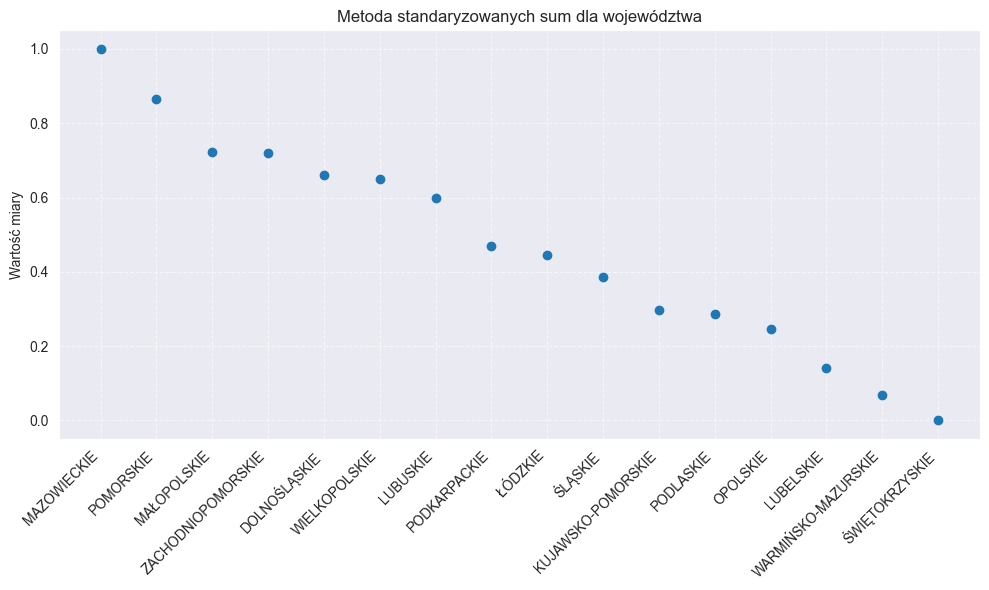

In [120]:
wojewodztwa_stand["syntetyczna"] = wojewodztwa_stand.iloc[:,1:].mean(axis=1)

# Standaryzacja syntetycznej
syntetyczna = wojewodztwa_stand["syntetyczna"]
min_s = syntetyczna.min()
max_s = syntetyczna.max()
wojewodztwa_stand["syntetyczna_standaryzowana"] = (syntetyczna - min_s) / (max_s - min_s)

posortowane_stand = wojewodztwa_stand[["wojewodztwo", "syntetyczna_standaryzowana"]].sort_values(
    by="syntetyczna_standaryzowana", ascending=False).reset_index(drop=True)

print("\n=== RANKING - METODA STANDARYZACJI (więcej = lepiej)===")
print(posortowane_stand)


X = range(len(posortowane_stand))
Y = posortowane_stand["syntetyczna_standaryzowana"].values
labels = posortowane_stand["wojewodztwo"]

stworz_wykres(X, Y, labels, "województwa", "Wartość miary", "Metoda standaryzowanych sum")




=== RANKING POWIATÓW - METODA RANG ===
         Powiat  syntetyczna_rangi_srednia
0    nowotarski                   5.444444
1     bocheński                   6.555556
2   nowosądecki                   7.444444
3      gorlicki                   7.444444
4      wielicki                   8.000000
5     tarnowski                   8.222222
6   oświęcimski                   8.777778
7       brzeski                   9.111111
8         suski                   9.333333
9    myślenicki                   9.444444
10    wadowicki                  10.111111
11   tatrzański                  10.777778
12  chrzanowski                  10.888889
13   miechowski                  11.333333
14   limanowski                  11.555556
15    krakowski                  11.666667
16      olkuski                  12.000000
17    dąbrowski                  12.777778
18  proszowicki                  12.888889


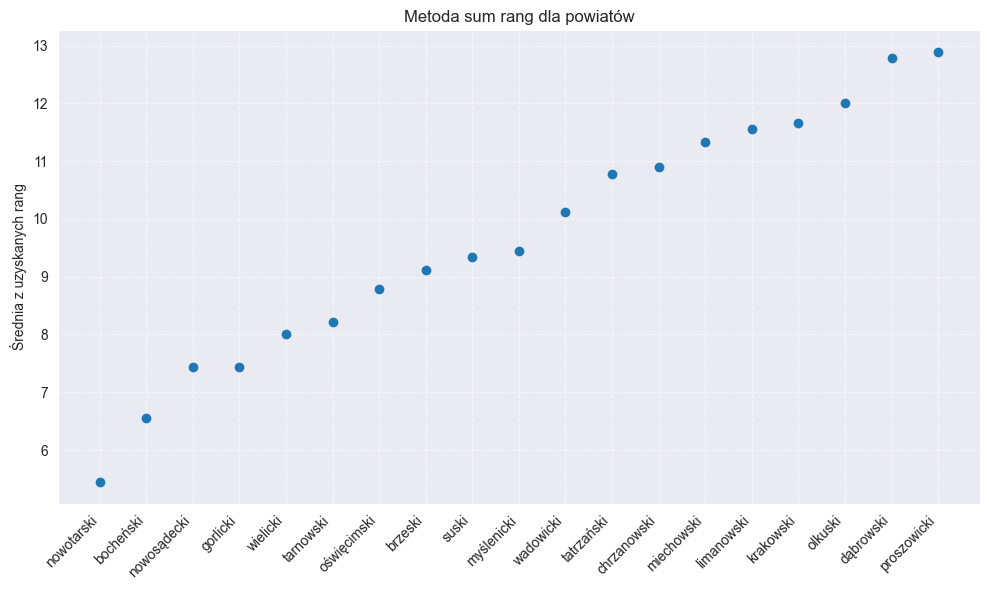

In [118]:
powiaty_rang = powiaty.copy()
powiaty_rang = zamiana_destymulanty(powiaty_rang, nominanty_pow, destymulanty_pow, optimum_pow)


rangi_cols = []
for col in powiaty_rang.iloc[:,1:]:
    rang_col = f"{col}_rang"
    powiaty_rang[rang_col] = powiaty_rang[col].rank(ascending=False, method='min')
    rangi_cols.append(rang_col)

powiaty_rang["syntetyczna_rangi_srednia"] = powiaty_rang[rangi_cols].mean(axis=1)

posortowane_rang = powiaty_rang[["Powiat", "syntetyczna_rangi_srednia"]].sort_values(
    by="syntetyczna_rangi_srednia", ascending=True).reset_index(drop=True)

print("\n=== RANKING POWIATÓW - METODA RANG ===")
print(posortowane_rang)


X = range(len(posortowane_rang))
Y = posortowane_rang["syntetyczna_rangi_srednia"].values
labels = posortowane_rang["Powiat"]

stworz_wykres(X, Y, labels, "powiatów", "Średnia z uzyskanych rang", "Metoda sum rang")




=== RANKING - METODA RANG ===
            wojewodztwo  syntetyczna_rangi_srednia
0             POMORSKIE                   5.888889
1          DOLNOŚLĄSKIE                   6.000000
2              LUBUSKIE                   6.777778
3         WIELKOPOLSKIE                   7.000000
4           MAŁOPOLSKIE                   7.222222
5    ZACHODNIOPOMORSKIE                   7.555556
6               ŚLĄSKIE                   7.666667
7           MAZOWIECKIE                   7.666667
8               ŁÓDZKIE                   8.333333
9    KUJAWSKO-POMORSKIE                   8.888889
10            PODLASKIE                   9.000000
11         PODKARPACKIE                   9.111111
12             OPOLSKIE                   9.444444
13            LUBELSKIE                  10.333333
14  WARMIŃSKO-MAZURSKIE                  11.222222
15       ŚWIĘTOKRZYSKIE                  12.000000


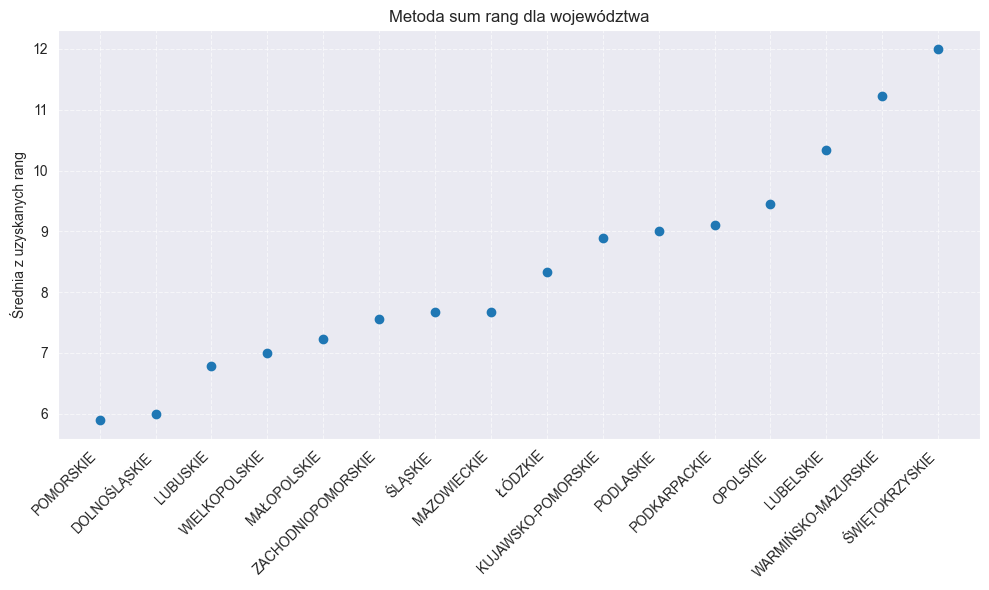

In [119]:
wojewodztwa_rang = wojewodztwa.copy()
wojewodztwa_rang = zamiana_destymulanty(wojewodztwa_rang, nominanty_woj, destymulanty_woj, optimum_woj)


rangi_cols = []
for col in wojewodztwa_rang.iloc[:,1:]:
    rang_col = f"{col}_rang"
    wojewodztwa_rang[rang_col] = wojewodztwa_rang[col].rank(ascending=False, method='min')
    rangi_cols.append(rang_col)

wojewodztwa_rang["syntetyczna_rangi_srednia"] = wojewodztwa_rang[rangi_cols].mean(axis=1)

posortowane_rang = wojewodztwa_rang[["wojewodztwo", "syntetyczna_rangi_srednia"]].sort_values(
    by="syntetyczna_rangi_srednia", ascending=True).reset_index(drop=True)

print("\n=== RANKING - METODA RANG ===")
print(posortowane_rang)


X = range(len(posortowane_rang))
Y = posortowane_rang["syntetyczna_rangi_srednia"].values
labels = posortowane_rang["wojewodztwo"]

stworz_wykres(X, Y, labels, "województw", "Średnia z uzyskanych rang", "Metoda sum rang")




=== RANKING - METODA HELLWIGA (TMR) ===
         Powiat       TMR
0   nowosądecki  0.342561
1   oświęcimski  0.269894
2    nowotarski  0.269838
3   chrzanowski  0.266784
4     krakowski  0.250712
5    tatrzański  0.227615
6     tarnowski  0.198503
7      gorlicki  0.189230
8      wielicki  0.159168
9     wadowicki  0.157219
10    bocheński  0.135728
11   limanowski  0.133219
12   myślenicki  0.123591
13      brzeski  0.117269
14      olkuski  0.116418
15   miechowski  0.100409
16    dąbrowski  0.062521
17        suski  0.055740
18  proszowicki  0.015262


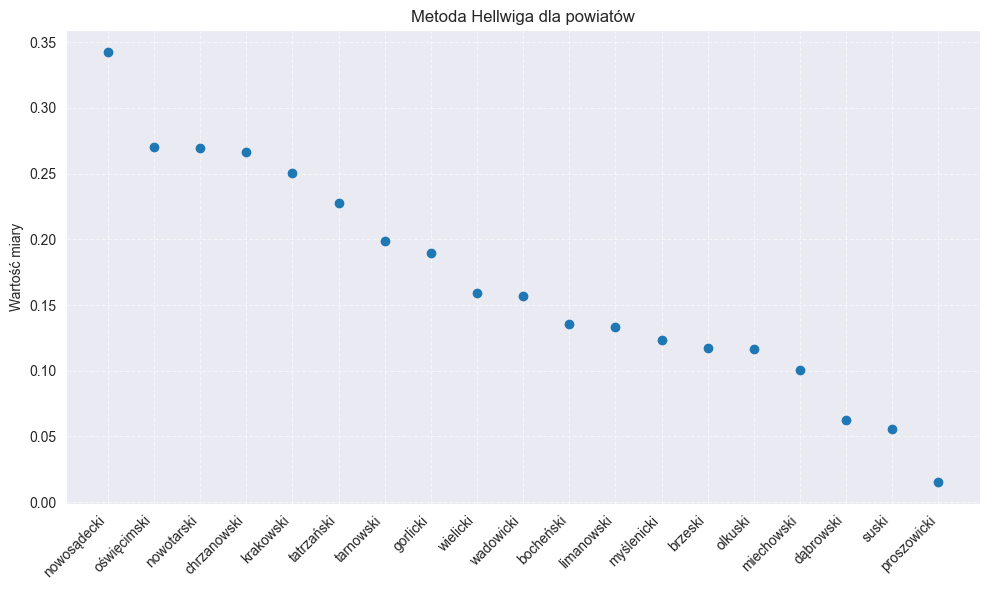

In [125]:
powiaty_hellwig = powiaty.copy()
powiaty_hellwig = zamiana_destymulanty(powiaty_hellwig, nominanty_woj, destymulanty_woj, optimum_woj)
powiaty_hellwig = standaryzacja(powiaty_hellwig)


cechy_numeryczne = [col for col in powiaty_hellwig.iloc[:,1:]]
wzorzec = powiaty_hellwig[cechy_numeryczne].max()

odleglosci = []
for i in range(len(powiaty_hellwig)):
    odleglosc = np.sqrt(sum((powiaty_hellwig.loc[i, cechy_numeryczne] - wzorzec)**2))
    odleglosci.append(odleglosc)

powiaty_hellwig['odleglosc_od_wzorca'] = odleglosci

# TMR
d0 = np.mean(odleglosci) + 2 * np.std(odleglosci)
powiaty_hellwig['TMR'] = 1 - (powiaty_hellwig['odleglosc_od_wzorca'] / d0)

posortowane_hellwig = powiaty_hellwig[['Powiat', 'TMR']].sort_values(
    by='TMR', ascending=False).reset_index(drop=True)

print("\n=== RANKING - METODA HELLWIGA (TMR) ===")
print(posortowane_hellwig)


X = range(len(posortowane_hellwig))
Y = posortowane_hellwig['TMR'].values
labels = posortowane_hellwig['Powiat']
stworz_wykres(X, Y, labels, "powiatów", "Wartość miary", "Metoda Hellwiga")




=== RANKING - METODA HELLWIGA (TMR) ===
            wojewodztwo       TMR
0             POMORSKIE  0.293162
1    ZACHODNIOPOMORSKIE  0.284955
2          DOLNOŚLĄSKIE  0.278685
3           MAZOWIECKIE  0.278277
4           MAŁOPOLSKIE  0.268452
5              LUBUSKIE  0.244733
6         WIELKOPOLSKIE  0.227844
7               ŁÓDZKIE  0.185358
8              OPOLSKIE  0.152336
9               ŚLĄSKIE  0.149003
10   KUJAWSKO-POMORSKIE  0.143605
11         PODKARPACKIE  0.141903
12            PODLASKIE  0.114855
13            LUBELSKIE  0.049231
14       ŚWIĘTOKRZYSKIE  0.030644
15  WARMIŃSKO-MAZURSKIE  0.028021


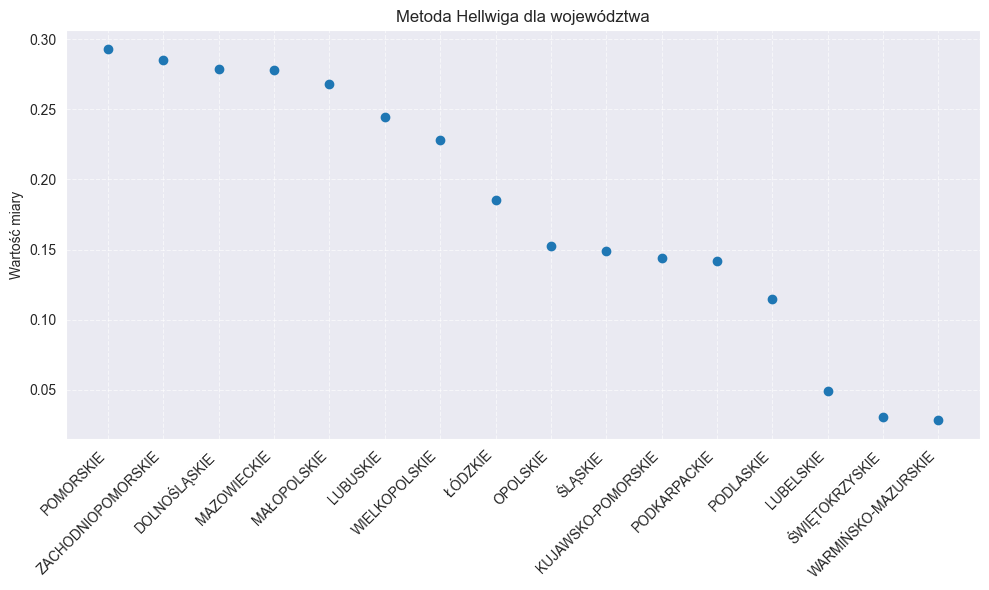

In [124]:
wojewodztwa_hellwig = wojewodztwa.copy()
wojewodztwa_hellwig = zamiana_destymulanty(wojewodztwa_hellwig, nominanty_woj, destymulanty_woj, optimum_woj)
wojewodztwa_hellwig = standaryzacja(wojewodztwa_hellwig)


cechy_numeryczne = [col for col in wojewodztwa_hellwig.iloc[:,1:]]
wzorzec = wojewodztwa_hellwig[cechy_numeryczne].max()

odleglosci = []
for i in range(len(wojewodztwa_hellwig)):
    odleglosc = np.sqrt(sum((wojewodztwa_hellwig.loc[i, cechy_numeryczne] - wzorzec)**2))
    odleglosci.append(odleglosc)

wojewodztwa_hellwig['odleglosc_od_wzorca'] = odleglosci

# TMR
d0 = np.mean(odleglosci) + 2 * np.std(odleglosci)
wojewodztwa_hellwig['TMR'] = 1 - (wojewodztwa_hellwig['odleglosc_od_wzorca'] / d0)

posortowane_hellwig = wojewodztwa_hellwig[['wojewodztwo', 'TMR']].sort_values(
    by='TMR', ascending=False).reset_index(drop=True)

print("\n=== RANKING - METODA HELLWIGA (TMR) ===")
print(posortowane_hellwig)


X = range(len(posortowane_hellwig))
Y = posortowane_hellwig['TMR'].values
labels = posortowane_hellwig['wojewodztwo']
stworz_wykres(X, Y, labels, "województwa", "Wartość miary", "Metoda Hellwiga")



In [140]:
def plt_wykres(n_clusters):
    plt.title(f"Wizualizacja klastrów KMeans (PCA) - {n_clusters} klastrów")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend(title="Klastry", loc='upper right')
    plt.show()


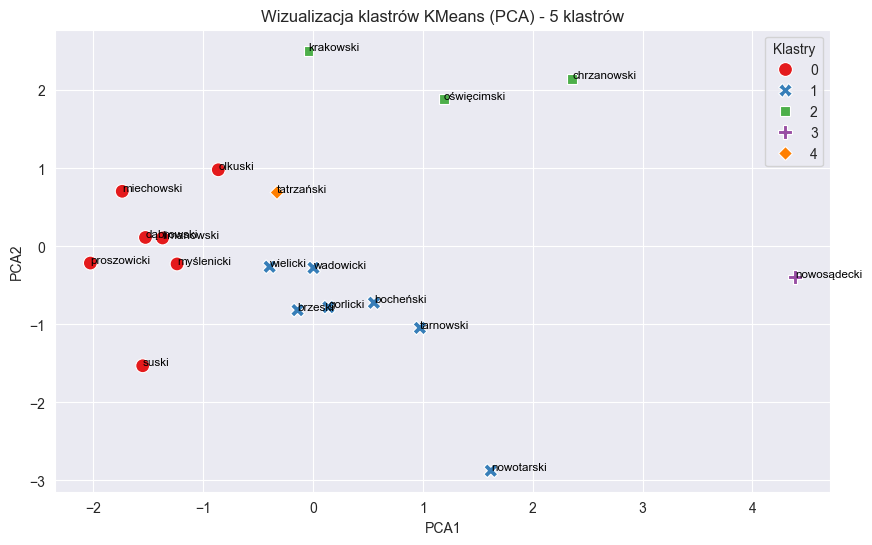

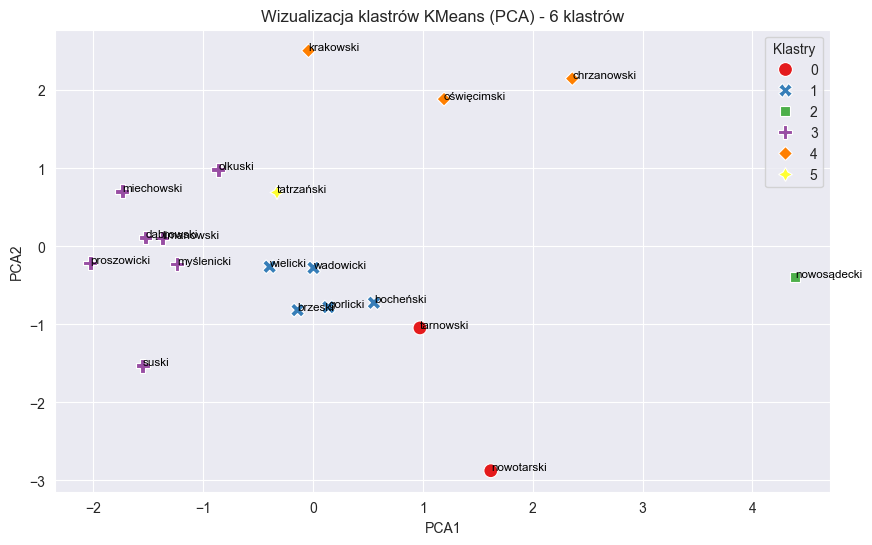

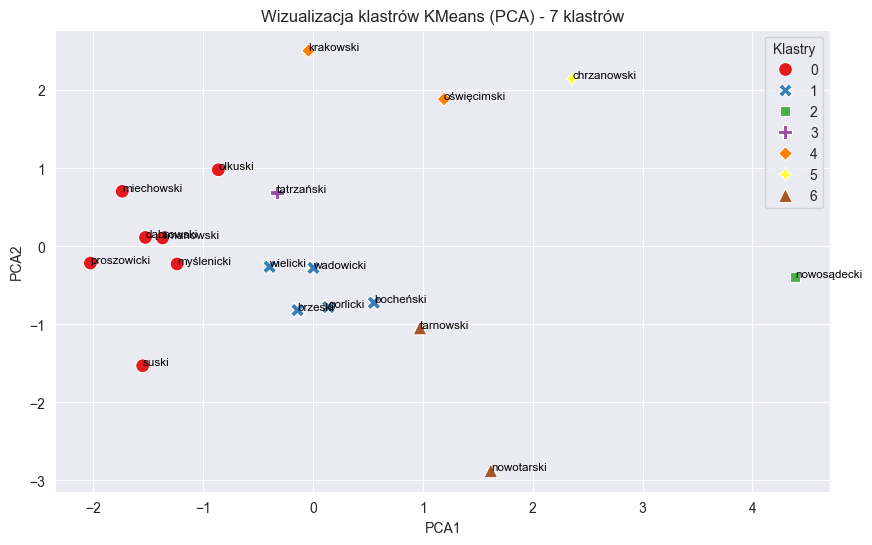

In [144]:
powiaty_kmean = powiaty.copy()

powiaty_kmean = powiaty_kmean[[col for col in powiaty_kmean.iloc[:,1:]]]
powiaty_kmean = standaryzacja(powiaty.drop(columns=['Powiat']))
for n_clusters in range(5, 8):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42).fit(powiaty_kmean)

    powiaty['gr2'] = kmeans.labels_

    pca = PCA(n_components=2)
    powiaty_pca_df = pd.DataFrame(pca.fit_transform(powiaty_kmean), columns=['PCA1', 'PCA2'])
    powiaty_pca_df['gr2'] = powiaty['gr2']
    powiaty_pca_df['Powiat'] = powiaty['Powiat']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='gr2', style='gr2', data=powiaty_pca_df, palette='Set1', s=100)


    for i in range(powiaty_pca_df.shape[0]):
        plt.text(powiaty_pca_df.PCA1[i], powiaty_pca_df.PCA2[i], powiaty_pca_df['Powiat'][i],
                 horizontalalignment='left', size='small', color='black')
    plt_wykres(n_clusters)



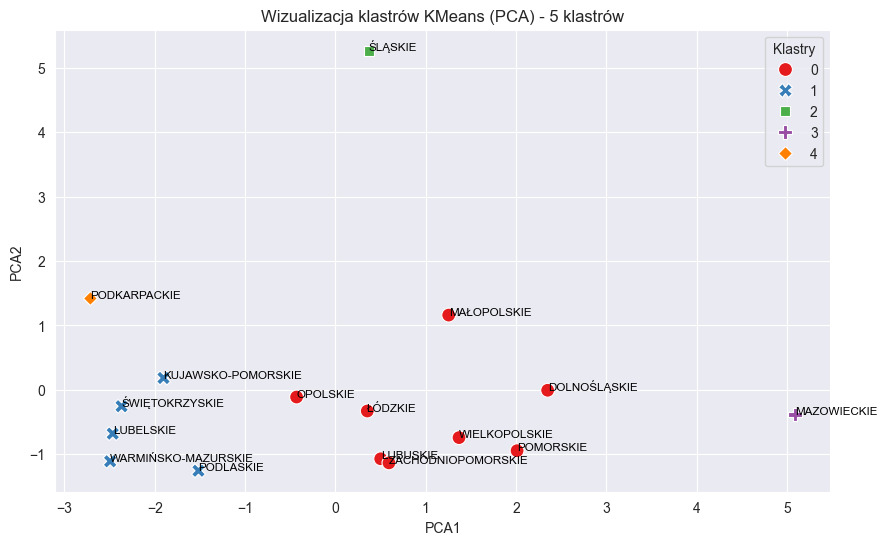

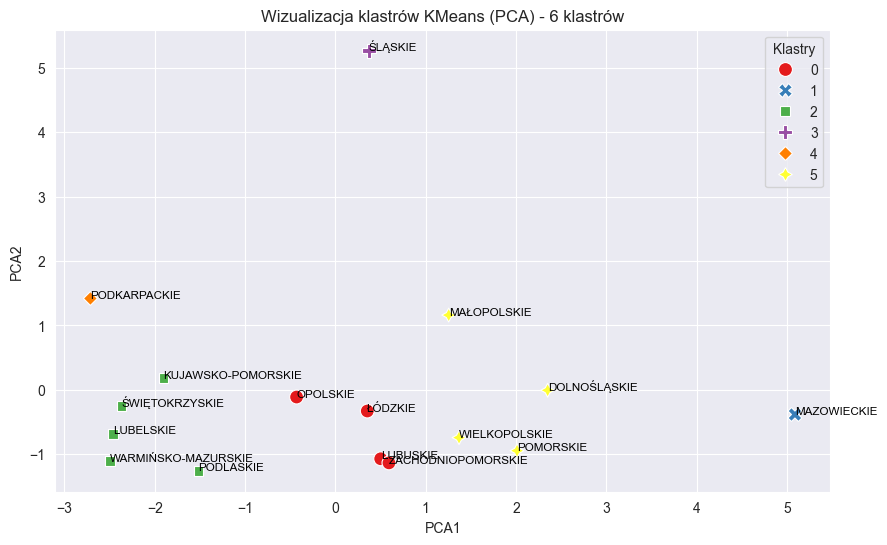

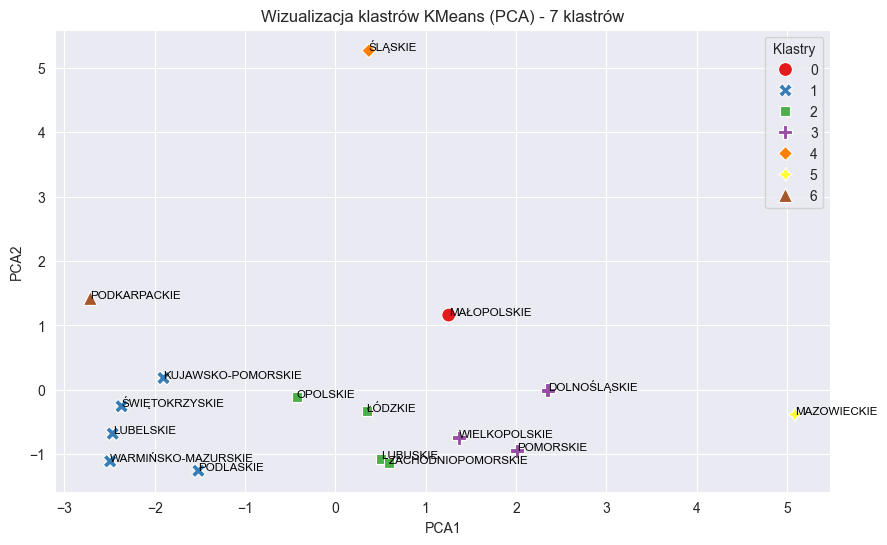

In [141]:
wojewodztwa_kmean = wojewodztwa.copy()

wojewodztwa_kmean = wojewodztwa_kmean[[col for col in wojewodztwa_kmean.iloc[:,1:]]]
wojewodztwa_kmean = standaryzacja(wojewodztwa.drop(columns=['wojewodztwo']))
for n_clusters in range(5, 8):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42).fit(wojewodztwa_kmean)

    wojewodztwa['gr2'] = kmeans.labels_

    pca = PCA(n_components=2)
    wojewodztwa_pca_df = pd.DataFrame(pca.fit_transform(wojewodztwa_kmean), columns=['PCA1', 'PCA2'])
    wojewodztwa_pca_df['gr2'] = wojewodztwa['gr2']
    wojewodztwa_pca_df['wojewodztwo'] = wojewodztwa['wojewodztwo']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='gr2', style='gr2', data=wojewodztwa_pca_df, palette='Set1', s=100)


    for i in range(wojewodztwa_pca_df.shape[0]):
        plt.text(wojewodztwa_pca_df.PCA1[i], wojewodztwa_pca_df.PCA2[i], wojewodztwa_pca_df['wojewodztwo'][i],
                 horizontalalignment='left', size='small', color='black')
    plt_wykres(n_clusters)



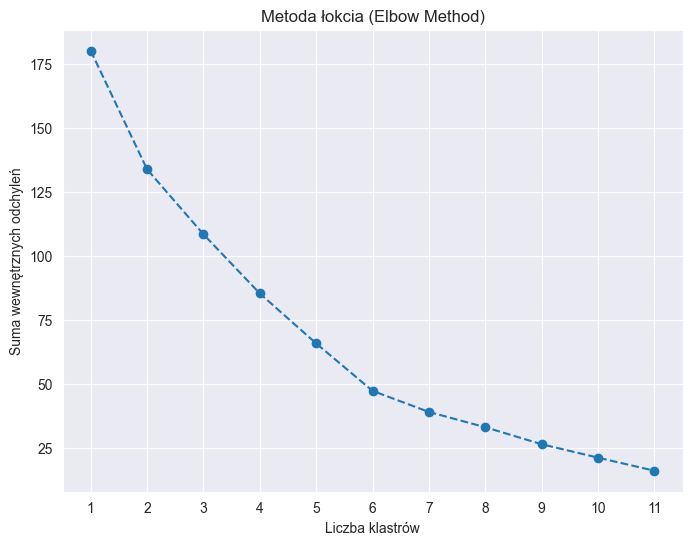

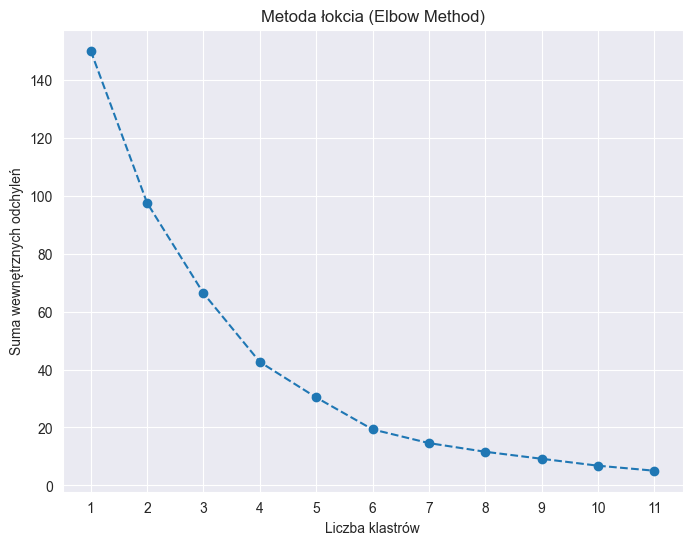

In [148]:
def plot_elbow_method(data, max_k=10):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), distortions, marker='o', linestyle='--')
    plt.title("Metoda łokcia (Elbow Method)")
    plt.xlabel("Liczba klastrów")
    plt.ylabel("Suma wewnętrznych odchyleń")
    plt.xticks(range(1, max_k+1))
    plt.show()
plot_elbow_method(powiaty_kmean, max_k=11)
plot_elbow_method(wojewodztwa_kmean, max_k=11)


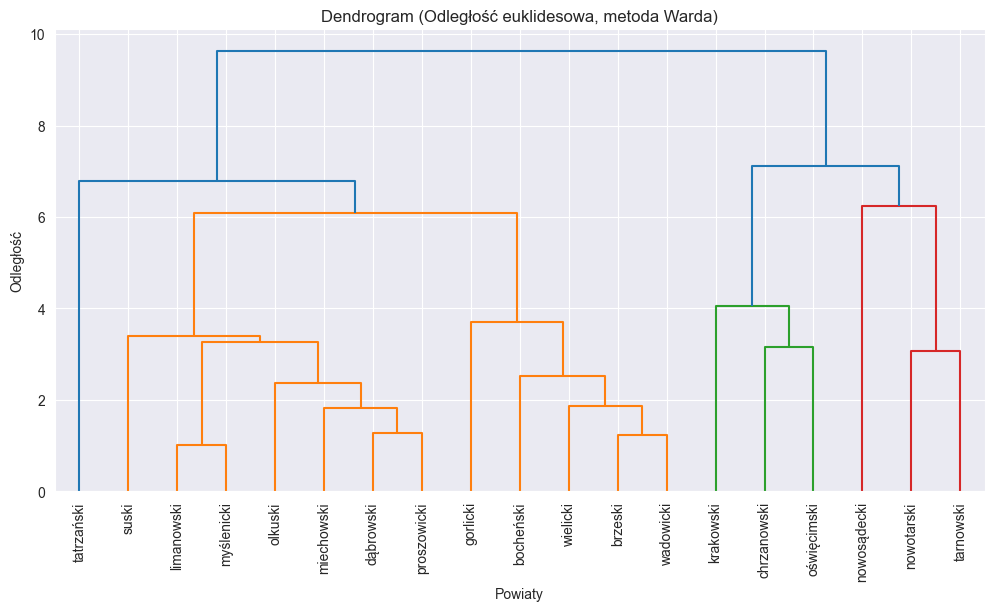

In [146]:
powiaty_kmean = powiaty.copy()

cechy_numeryczne = [col for col in powiaty_kmean.columns if col != "Powiat"]
powiaty_kmean = powiaty_kmean[cechy_numeryczne]
powiaty_kmean = standaryzacja(powiaty_kmean)
dist_euclidean = pdist(powiaty_kmean, metric='euclidean')

ward_euclidean = linkage(dist_euclidean, method='ward')

# Wizualizacja dendrogramu
plt.figure(figsize=(12, 6))
dendrogram(ward_euclidean, labels=powiaty['Powiat'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Odległość euklidesowa, metoda Warda)")
plt.xlabel("Powiaty")
plt.ylabel("Odległość")
plt.show()


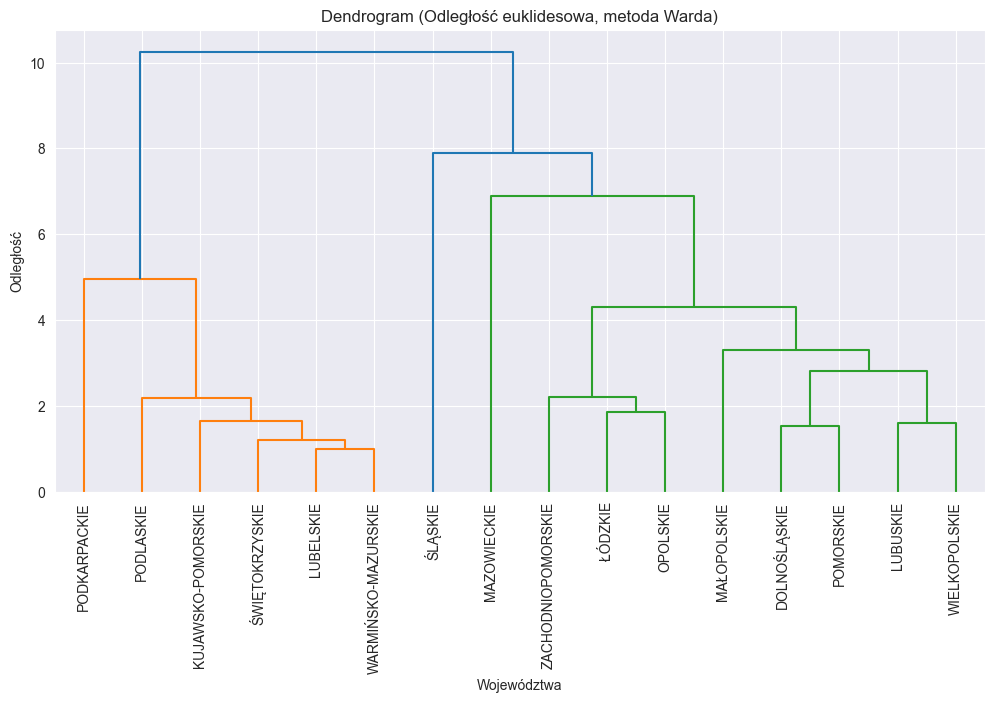

In [147]:

dist_euclidean = pdist(wojewodztwa_kmean, metric='euclidean')

ward_euclidean = linkage(dist_euclidean, method='ward')

# Wizualizacja dendrogramu
plt.figure(figsize=(12, 6))
dendrogram(ward_euclidean, labels=wojewodztwa['wojewodztwo'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Odległość euklidesowa, metoda Warda)")
plt.xlabel("Województwa")
plt.ylabel("Odległość")
plt.show()
